# Deep Learning from Scratch

1. <font color=gray>헬로파이썬</font>
2. <font color=gray>퍼셉트론</font>
3. <font color=gray>신경망</font>
4. <font color=red>신경망 학습</font>
5. 오차역전파법
6. 학습 관련 기술들
7. 합성곱 신경망 (CNN)
8. 딥러닝

# 4. 신경망 학습

4.1. <font color=gray>데이터에서 학습한다.</font> <br/>
4.2. <font color=gray>손실함수</font> <br/>
4.3. <font color=red>수치미분</font> <br/>
4.4. 기울기 <br/>
4.5. 학습알고리즘 구현하기 <br/>



## 4.3. 수치미분

## !!! 지금 공부하고 있는 것은?

지금 공부하고 있는것은 모두 결국, **적절한 가중치와 편향을 구하는 것**

**적절한가?** => 손실함수의 결과값이 최소인가?

**적절하게 조정하는 방법** => stochastic gradient decent (optimization algorithm)

책에선 gradient decent를 알아가는 과정으로, **4.3.수치미분, 4.4.기울기**

# 밑바닥부터 시작하는, 적절한 가중치 찾는 법
(Stanford CS231n 강의를 인용함)

Strategy #1 : **random search**

Strategy #2 : **random local search**

Strategy #3 : **following the gradient**

### Strategy #1 : Random search
무작위로 W를 정해보고, 오차를 산출하여
그 중 가장 적은 오차가 나오는 W를 선정한다.

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
bestloss = float("inf") # Python assigns the highest possible float value
for num in range(1000):
    W = np.random.randn(10, 3073) * 0.0001 # generate random parameters
    loss = L(X_train, Y_train, W) # get the loss over the entire training set
    if loss < bestloss: # keep track of the best solution
        bestloss = loss
        bestW = W
    print('in attempt %d the loss was %f, best %f' % (num, loss, bestloss))

# prints:
# in attempt 0 the loss was 9.401632, best 9.401632
# in attempt 1 the loss was 8.959668, best 8.959668
# in attempt 2 the loss was 9.044034, best 8.959668
# in attempt 3 the loss was 9.278948, best 8.959668
# in attempt 4 the loss was 8.857370, best 8.857370
# in attempt 5 the loss was 8.943151, best 8.857370
# in attempt 6 the loss was 8.605604, best 8.605604
# ... (trunctated: continues for 1000 lines)

## Blindfolded hiker analogy

눈가리고 하산하는 것에 비유
<img src="https://ak5.picdn.net/shutterstock/videos/8119645/thumb/1.jpg" alt="img" style="width:50%;"/>

## Strategy #2 : Random local search
시작점에서 무작위로 방향을 정해서 발을 살짝 뻗어서 더듬어보고 그게 내리막길일 때만 한발짝 내딛는 것

In [ ]:
W = np.random.randn(10, 3073) * 0.001 # 임의의 시작 파라미터를 랜덤하게 고른다.
bestloss = float("inf")
for i in xrange(1000):
    step_size = 0.0001
    Wtry = W + np.random.randn(10, 3073) * step_size
    loss = L(Xtr_cols, Ytr, Wtry)
    if loss < bestloss:
        W = Wtry
        bestloss = loss
  print 'iter %d loss is %f' % (i, bestloss)

## Strategy #3 : following the gradient
발 밑 지형을 잘 더듬어보고 가장 가파르다는 느낌을 주는 방향으로 내려가는 것

In one-dimensional functions, the **slope** is the instantaneous rate of change of the function at any point you might be interested in.
<br/>
<br/>
The **gradient** is a generalization of slope for functions that don’t take a single number but a vector of numbers

In [ ]:
def eval_numerical_gradient(f, x):
    """ 
    a naive implementation of numerical gradient of f at x 
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """ 
    fx = f(x) # evaluate function value at original point
    grad = np.zeros(x.shape)
    h = 0.00001
    
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        # evaluate function at x+h
        ix = it.multi_index
        old_value = x[ix]
        x[ix] = old_value + h # increment by h
        fxh = f(x) # evalute f(x + h)
        x[ix] = old_value # restore to previous value (very important!)
        
        # compute the partial derivative
        grad[ix] = (fxh - fx) / h # the slope
        it.iternext() # step to next dimension
    return grad

# 밑바닥부터 시작하는, 미분
(신경망 첫걸음 책에서 인용)
* 직선 / 기울기를 가지는 직선 / 곡선
* 손으로 구하는 미분
* 손으로 구하지 않는 미분
* 그래프없이 하는 미분

### 직선
크루즈 모드로 자동차가 달리고 있다

|시간(분)|속도(마일/시간)|
|--------|-------------|
|0.0|30|
|0.5|30|
|1.0|30|
|1.5|30|
|2.0|30|
|2.5|30|

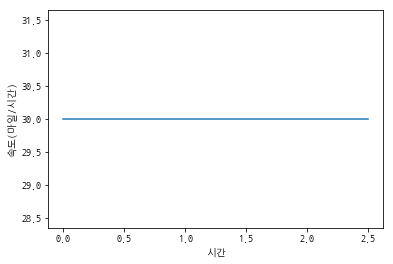

In [4]:
x = np.arange(0.0, 3.0, 0.5)
y = np.array([30,30,30,30,30,30])
plt.xlabel("시간")
plt.ylabel("속도(마일/시간)")
plt.plot(x, y)
plt.show()

속도는?
\begin{align}
s = 30
\end{align}

시간에 따라 속도가 어떻게 변화하는가?
\begin{align}
\frac{\partial s}{\partial t} = 0
\end{align}

### 경사를 가지는 직선
|시간(분)|속도(마일/시간)|
|--------|-------------|
|0.0|30|
|0.5|35|
|1.0|40|
|1.5|45|
|2.0|50|
|2.5|55|

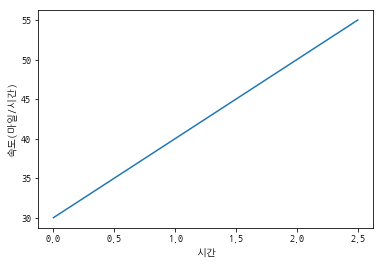

In [5]:
x = np.arange(0.0, 3.0, 0.5)
y = np.arange(30,60,5)
plt.xlabel("시간")
plt.ylabel("속도(마일/시간)")
plt.plot(x, y)
plt.show()

속도는?
\begin{align}
s = 30 + 10t
\end{align}

시간에 따라 속도가 어떻게 변화하는가?
\begin{align}
\frac{\partial s}{\partial t} = 10
\end{align}

### 곡선
|시간(분)|속도(마일/시간)|
|--------|-------------|
|0|0|
|1|1|
|2|4|
|3|9|
|4|16|
|5|25|
|6|36|
|7|49|
|8|64|

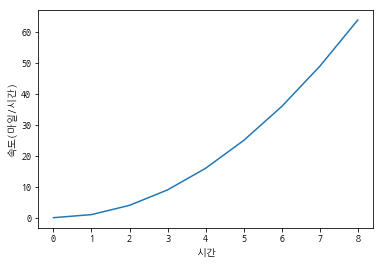

In [6]:
x = np.arange(0, 9, 1)
y = np.array([0,1,4,9,16,25,36, 49,64])
plt.xlabel("시간")
plt.ylabel("속도(마일/시간)")
plt.plot(x, y)
plt.show()

속도는?
\begin{align}
s = t^2
\end{align}

속도의 **변화율**은 시간에 대한 속도의 그래프의 기울기

### 직선 / 기울기를가지는 직선 / 곡선
자동차가 30km/h 로 일정하게 달릴때 변화율은 0 **(직선)**<br/><br/>
일정하게 속도를 높여가는 경우 변화율은 10km/h **(기울기를 가지는 직선)**<br/><br/>
일정하게 속도의 증가율이 증가하는 경우 **(곡선)**

### 손으로 구하는 미분
<img src="https://github.com/emotionalcode/deep-learning-from-scratch/blob/master/ch04/image11.png?raw=true" alt="img" style="width:40%;" />

어떤순간에서의 변화율
= 그 순간에서의 기울기<br/>

\begin{align}
\frac{\delta s}{\delta t}
= \frac{9.6}{0.8}
= 12.0
\end{align}

6분에서의 속도의 변화율은 12.0

### 손으로 구하지 않는 미분
<img src="https://github.com/emotionalcode/deep-learning-from-scratch/blob/master/ch04/image12.png?raw=true" alt="img" style="width:40%;" />

\begin{equation*}
기울기 =  \frac{높이}{길이}
\end{equation*}
\begin{equation*}
= \frac{24}{4}
\end{equation*}
\begin{equation*}
= 6
\end{equation*}

### 그래프 없이 하는 미분

$s = t^2$ 에서,
\begin{align}
높이 = (t + \delta x)^2 - (t - \delta x)^2
\end{align}
\begin{align}
길이 = (t + \delta x) - (t - \delta x) = 2\delta x
\end{align}

\begin{align}
\frac{\delta s}{\delta t}
= \frac{높이}{길이}
= \frac{(t+\delta x)^2 - (t-\delta x)^2}{2\delta x}
= \frac{t^2 + \delta x^2 + 2t\delta x - t^2 - \delta x^2 + 2t\delta x}{2\delta x} = \frac{4t\delta x}{2\delta x} = 2t
\end{align}

어떤 순간에라도 자동차의 속도의 변화율을 정확히 계산할 수 있는 수학적 수식<br/>
<br/>
$t = 100$분이면, $\delta s$ / $\delta t = 2t = 200$ mph/m
<br/>
(100분이 경과하면 자동차는 분당 시속 200마일이라는 속도의 변화율을 가짐.)

### 패턴

\begin{align}
s = t^2 \to \frac{\delta s}{\delta t} = 2t
\end{align}

\begin{align}
s = t^2 + 2t \to \frac{\delta s}{\delta t} = 2t + 2
\end{align}

\begin{align}
s = t^3 \to \frac{\delta s}{\delta t} = 3t^2
\end{align}

\begin{align}
y = ax^n \to \frac{\delta y}{\delta x} = nax^{n-1}
\end{align}

# 4.3.1 미분
$$\frac{df(x)}{dx} = \lim_{h\to 0}\frac{f(x+h) - f(x)}{h}$$

In [7]:
import numpy as np
import matplotlib.pylab as plt

def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / (h) # ! rounding error

In [8]:
np.float32(1e-50)

0.0

In [9]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x+h) - f(x-h)) / (2*h) #중심차분

후방차분 / 전방차분 / 중심차분
![image.png](img5.png)

# 4.3.2 수치미분의 예

간단한 함수를 미분해보자
\begin{align}
y = 0.01x^2 + 0.1x
\end{align}

In [10]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

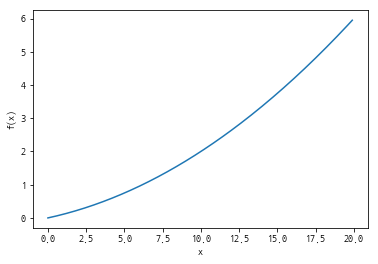

In [11]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

미분 계산 (x = 5 일때, x = 10일때)

In [12]:
numerical_diff(function_1, 5)

0.1999999999990898

In [13]:
numerical_diff(function_1, 10)

0.2999999999986347

해석적 해법
\begin{align}
y = 0.01x^2 + 0.1x 
\end{align}
를 미분하면,
\begin{align}
y = 0.02x + 0.1
\end{align}

**gradient check** : numerical gradient와 analytic gradient를 비교하는 과정 

In [14]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

0.1999999999990898


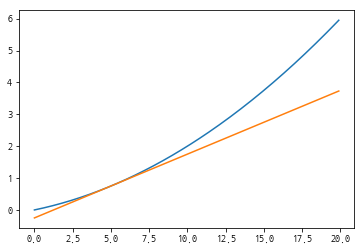

In [15]:
tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

0.2999999999986347


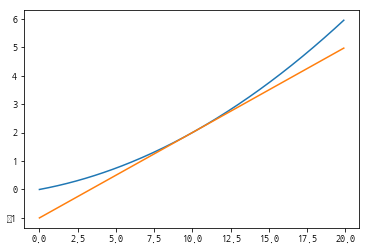

In [16]:
tf = tangent_line(function_1, 10)
y3 = tf(x)

plt.plot(x, y)
plt.plot(x, y3)
plt.show()

# 4.3.3 편미분

변수가 2개

$f(x_0,x_1) = x_0^2 + x_1^2$


여러 변수 중 목표변수 하나에 초점을 맞추고 다른 변수는 값을 고정해서 기울기를 구함

In [17]:
def function_2(x):
    #return x[0]**2 + x[1]**2
    return np.sum((x[0]**2) + (x[1]**2))

<img src="https://github.com/emotionalcode/deep-learning-from-scratch/blob/master/ch04/fig 4-8.png?raw=true" alt="img" style="width:400px;"/>

문제1

$x_0 = 3$, $x_1 = 4$ 일때, $x_0$에 대한 편미분 \begin{align} \frac{\partial f}{\partial x_0} \end{align} 을 구하라

In [18]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

문제2

$x_0 = 3$, $x_1 = 4$ 일때, $x_1$에 대한 편미분 \begin{align} \frac{\partial f}{\partial x_1} \end{align} 을 구하라

In [19]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4 기울기

$x_0$와 $x_1$의 편미분을 동시에 계산

$x_0 = 3$, $x_1 = 4$ 일때 $(x_0, x_1)$ 양쪽의 편미분을 묶어 

$(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$

모든 변수의 편미분을 벡터로 정리한 것을 gradient라고 합니다.

gradient의 구현

In [20]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [21]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([ 6.,  8.])

In [22]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([ 0.,  4.])

In [23]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([ 6.,  0.])

기울기의 결과에 마이너스를 붙인 벡터

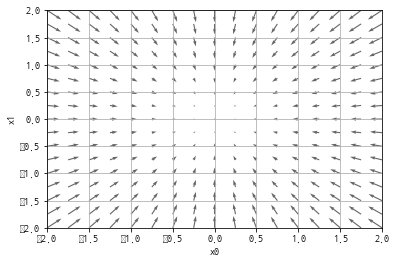

In [24]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x): 
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

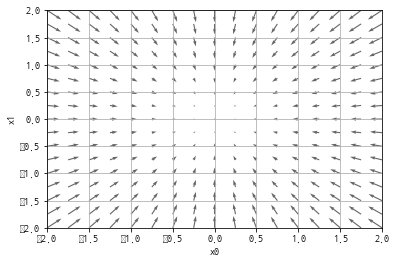

In [25]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

기울기가 가리키는 쪽은 각 장소에서 함수의 출력값을 가장 줄이는 방향

# 4.4.1 경사법 (경사 하강법)

경사법(gradient method) = 기울기를 이용, 기울어진 방향으로 일정 거리만큼 이동 -> 기울기를 구하고 방향을 찾아 이동 -> 반복

고원(plateau. 플래토). 학습이 진행되지 않는 정체기

수식
\begin{align} 
x_0 = x_0 - \eta\frac{\delta f}{\delta x_0}
\end{align} 
<br/>
\begin{align} 
x_1 = x_1 - \eta\frac{\delta f}{\delta x_1}
\end{align} 

In [26]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

문제

경사법으로 $f(x_0, x_1) = x_0^2 + x_1^2$의 최솟값을 구하라

In [27]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [28]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([ -6.11110793e-10,   8.14814391e-10])

갱신과정을 그림으로

In [29]:
def gradient_descent_for_chart(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

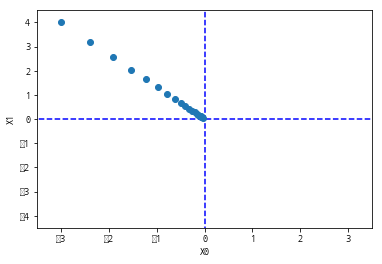

In [30]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent_for_chart(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률이 너무 큰 예 : learning rate = 10.0

In [31]:
init_x = np.array([-3.0, 4.0])    
gradient_descent(function_2, init_x, lr=10.0, step_num=100)

array([ -2.58983747e+13,  -1.29524862e+12])

학습률이 너무 작은 예: lr = 1e-10

In [32]:
init_x = np.array([-3.0, 4.0])  
gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

### 하이퍼 파라미터

learning rate, 반복횟수 등 사람이 직접 설정해야 하는 매개변수

# 4.4.2 신경망에서의 기울기

형상이 2x3, 가중치가 $W$, 손실함수가 $L$인 신경망.

경사는 $\frac{\partial L}{\partial W}$

$W = \begin{vmatrix} W_{11} & W_{21} & W_{31} \\ W_{12} & W_{22} & W_{32} \end{vmatrix}$

$\frac{\partial L}{\partial W} = \begin{vmatrix} \frac{\partial L}{\partial W_{11}} & \frac{\partial L}{\partial W_{21}} & \frac{\partial L}{\partial W_{31}} \\ \frac{\partial L}{\partial W_{12}} & \frac{\partial L}{\partial W_{22}} & \frac{\partial L}{\partial W_{32}} \end{vmatrix}$

$\frac{\partial L}{\partial W}$의 각 원소는 각각의 원소에 관한 편미분

예를 들어 1행 1번째  $\frac{\partial L}{\partial W_{11}}$는 $W_{11}$을 조금 변경했을 때 손실 함수 $L$이 얼마나 변화하느냐를 나타냄

$W$와 $\frac{\partial L}{\partial W}$ 의 형상은 모두 2x3으로 같다

In [33]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [34]:
net = simpleNet()
print(net.W) #가중치 매개변수

[[ 0.89746135 -1.86006145  0.27033217]
 [ 0.67168429 -0.45856126  0.74096409]]


In [35]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.14299267 -1.528742    0.82906698]


In [36]:
np.argmax(p) #최댓값의 인덱스

0

In [37]:
t = np.array([0,0,1]) #정답레이블
net.loss(x, t)

0.90154849070705667

In [38]:
def f(W):
    return net.loss(x, t)

In [39]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.33338779  0.02304783 -0.35643563]
 [ 0.50008169  0.03457175 -0.53465344]]


In [40]:
#lambda
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.33338779  0.02304783 -0.35643563]
 [ 0.50008169  0.03457175 -0.53465344]]
